## Read Dataset

In [2455]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import seaborn as sn
df = pd.read_csv('../traineddataUpdate.csv')
df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080


In [2456]:
df.shape

(1302, 13)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

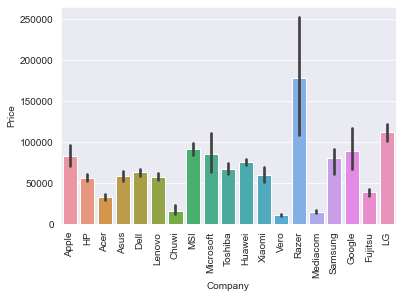

In [2457]:
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')

C:\Users\salitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

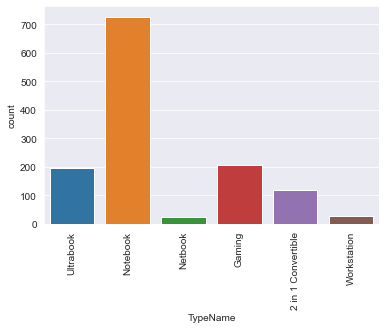

In [2458]:
sn.countplot(df['TypeName'])
plt.xticks(rotation = 'vertical')

C:\Users\salitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


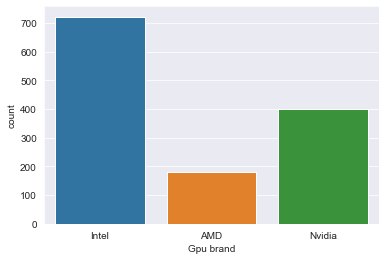

In [2459]:
sn.countplot(df['Gpu brand'])
plt.show()

In [2460]:
cpu_manufact = df['CPU_name'].str.split(' ',n = 1,expand=True)
cpu_manufact.head()
df['CPU_manufacture'] = cpu_manufact[0]

In [2461]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel


<AxesSubplot:ylabel='None'>

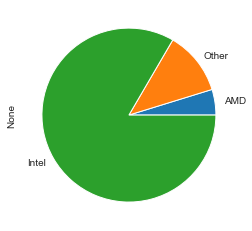

In [2462]:
cpu_value = df.value_counts('CPU_manufacture')
cpu_value.sort_values().plot(kind='pie')

In [2463]:
CPU_manufacture_type = df.value_counts("CPU_manufacture")
print(CPU_manufacture_type)

CPU_manufacture
Intel    1086
Other     154
AMD        62
dtype: int64


In [2464]:
def type_convert_numeric1():
    df['CPU_manufacture_type'] = np.select(
        condlist=[
            df['CPU_manufacture'] == "Intel",
            df['CPU_manufacture'] == "Other",
            df['CPU_manufacture'] == "AMD",
        ],
        choicelist=[
            0,
            1,
            2
        ],
        default=0
    )

listTypes = ["Intel", "Other", "AMD"]
for value in listTypes:
    type_convert_numeric1()

df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture,CPU_manufacture_type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel,0
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel,0
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel,0
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel,0
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel,0


In [2465]:
notebook_type = df.value_counts("TypeName")
print(notebook_type)


TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
dtype: int64


In [2466]:
def type_convert_numeric():
    df['Type'] = np.select(
        condlist=[
            df['TypeName'] == "Notebook",
            df['TypeName'] == "Gaming",
            df['TypeName'] == "Ultrabook",
            df['TypeName'] == "2 in 1 Convertible",
            df['TypeName'] == "Workstation",
            df['TypeName'] == "Netbook",
        ],
        choicelist=[
            0,
            1,
            2,
            3,
            4,
            5
        ],
        default=0
    )

listTypes = ["Notebook", "Gaming", "Ultrabook", "2 in 1 Convertible", "Workstation", "Netbook"]
for value in listTypes:
    type_convert_numeric()

df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture,CPU_manufacture_type,Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel,0,2
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel,0,2
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel,0,0
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel,0,2
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel,0,2


In [2467]:
company = df.value_counts("Company")
print(company)

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Fujitsu        3
Chuwi          3
LG             3
Huawei         2
dtype: int64


In [2468]:
df.isnull().sum().sum()

0

<AxesSubplot:xlabel='Price', ylabel='Count'>

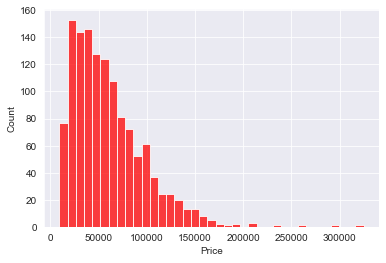

In [2469]:
sn.histplot(df['Price'],color='red')

# Vizualize data

## Define X and Y cordinates

In [2470]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


#x = df.drop(['Price', 'Company', 'TypeName', 'OpSys', 'CPU_name', 'CPU_manufacture', 'Gpu brand'], axis=1)
#x = np.log(df.drop(['Price', 'Company', 'TypeName', 'OpSys', 'CPU_name', 'CPU_manufacture', 'Gpu brand'], axis=1))

x = df.drop(['Price'], axis=1)
#y = df['Price']
testing = np.log(df['Price'])



In [2471]:
x

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,CPU_manufacture,CPU_manufacture_type,Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Intel,0,2
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Intel,0,2
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Intel,0,0
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Intel,0,2
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Intel,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Intel,0,3
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Intel,0,3
1299,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Other,1,0
1300,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Intel,0,0


In [2472]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, testing, test_size=0.15, random_state=2)

X_train.shape,X_test.shape

((1106, 15), (196, 15))

In [2473]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand',
 12: 'CPU_manufacture',
 13: 'CPU_manufacture_type',
 14: 'Type'}

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11,12,14])
],remainder='passthrough')



step2 = RandomForestRegressor(n_estimators=1000,
                              random_state=2,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=100)


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))


# Main Points to Concern

In [ ]:
#when adding np.log accuracy increased from 0.817992766637844 to 0.8872578010268356


# Description

## 1

When dropping columns with df.drop
without pipeline accuracy - 0.7668858153216616
with pipeline - 0.7668858153216616

So with pipeline noting specially happens

## 2

When using np.log for testing dataset with dropping columns with df.drop in training

Previous - 0.7668858153216616
with/without pipeline - 0.8200408569709455

So np.log significant change happens

Special thing here is if we use np.log to training dataset error occur with Input contains NaN, infinity or a value too large for dtype('float32').

## 3

When dropping type column

Previous (without dropping) - 0.8200408569709455
now - 0.7883011987665366
and with adding CPU_manufacture_type accuracy increased from 0.8200 to 0.8507

So with having type and CPU_manufacture_type column significant change happens

## 4

when we use df.drop([]) with column drop instead of accuracy dropped ColumnTransformer

Previous - 0.8507952228709466
now - 0.8872182051267166
dropping only CPU_manufacture_type with ColumnTransformer - 0.8875035810985037
dropping only type with ColumnTransformer - 0.8893041991733325
dropping both with ColumnTransformer - 0.8862410001112703


So with having CPU_manufacture_type column high accuracy can be gain

## 5

when test size is 0.3 accurcy is 0.8691216458540366, 0.15 - 0.8893041991733325, 0.1 - 0.8824622418662149

So with having 0.15 testing size high accuracy can be gain

## 6

when test size is 0.3 accurcy is 0.8691216458540366, 0.15 - 0.8893041991733325, 0.1 - 0.8824622418662149


So with having 0.15 testing size high accuracy can be gain
And with having random stae = 2 high accuracy is there 0.8893041991733325

## 7

when RandomRegressor
n_estimators = 1000 accuracy - 0.8907109890050905
100 = acc - 0.8893041991733325


But when increasing more than 1000 noting spcially happens to accuracy

## 8

when RandomRegressor with n_estimators = 1000

random size = 1 - accuracy - 0.8911787220521755
random size = 42 - accuracy - 0.8907109890050905
random size = 2 - accuracy - 0.8911842454947371

highest accuracy is with random size = 2

## 9

n_estimators=1000,
random_state=2,
max_samples=0.5,
max_features=0.75,
max_depth=100

with accuracy 0.891968 can be gain